# Working with word embeddings

So far we've seen a couple of key Python libraries for doing specific tasks in NLP. For example, ```scikit-learn``` provides a whole host of fundamental machine learning algortithms; ```spaCy``` allows us to do robust linguistic analysis; ```pandas``` for working with dataframes; ```numpy``` for numerical calculations; and ```matplotlib``` for simple plotting.

Today, we're going to meet ```gensim``` which is the best way to work with (static) word embeddings like word2vec. You can find the documentation [here](https://radimrehurek.com/gensim/).

In [1]:
import gensim
import gensim.downloader
import gensim.downloader as api

import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA

Gensim has many pre-trained static word embeddings. Below, I get a list via the gensim download API to see the options.

In [ ]:
# keys in the returned dicts that are of interest to use
info_keys = ['description', 'base_dataset']


for model_name, model_info in gensim.downloader.info()['models'].items():
    print(model_name)
    for key in info_keys:
        if key not in model_info:
            continue
        info = model_info[key]
        print('\t', key, ':', info)


fasttext-wiki-news-subwords-300
	 description : 1 million word vectors trained on Wikipedia 2017, UMBC webbase corpus and statmt.org news dataset (16B tokens).
	 base_dataset : Wikipedia 2017, UMBC webbase corpus and statmt.org news dataset (16B tokens)
conceptnet-numberbatch-17-06-300
	 description : ConceptNet Numberbatch consists of state-of-the-art semantic vectors (also known as word embeddings) that can be used directly as a representation of word meanings or as a starting point for further machine learning. ConceptNet Numberbatch is part of the ConceptNet open data project. ConceptNet provides lots of ways to compute with word meanings, one of which is word embeddings. ConceptNet Numberbatch is a snapshot of just the word embeddings. It is built using an ensemble that combines data from ConceptNet, word2vec, GloVe, and OpenSubtitles 2016, using a variation on retrofitting.
	 base_dataset : ConceptNet, word2vec, GloVe, and OpenSubtitles 2016
word2vec-ruscorpora-300
	 description 

In [3]:
# go ahead an experiment with different models.
# below I will use a smaller model for demo purposes
# bigger models will take some time to load!
model = api.load("glove-twitter-100")

[==================================================] 100.0% 387.1/387.1MB downloaded


I've (not I Kasper, but Ross. Thanks, Ross!) outlined a couple of tasks for you below to experiment with. Use these just a stepping off points to explore the nature of word embeddings and how they work.

Work in small groups on these tasks and make sure to discuss the issues and compare results!

### Task 0: The vectors

Have a look at a vector. Maybe two. While they are black box representations of words, it may help you to get a sense of what they are in practice: long lists of numbers.

In [7]:
cat_vector = model["cat"]

In [8]:
cat_vector.shape

(100,)

In [10]:
# When they arre nothing but regular vectors in practice, we can do all sorts of things with them. Some may make sense, some may not.

# n principle, this may remove the "feline" part of a cat. What might be left?
model["cat"] - model["feline"]

array([ 0.28378   ,  0.51154006,  0.58068997,  0.06518   , -0.316148  ,
        0.09908   ,  0.68097997,  0.32469   ,  0.46798003,  0.45884332,
       -0.18392   ,  0.74072003, -2.62524   ,  0.44317302, -0.184625  ,
        0.55441004,  0.07789001,  0.281647  ,  0.152997  , -0.83138   ,
       -0.2303432 , -0.03797999,  0.5052    , -0.5836081 ,  0.81937003,
       -1.52746   , -0.67188   ,  0.05814001,  0.52458   ,  0.17989   ,
        0.253675  ,  0.05417   ,  0.07034999, -0.159674  ,  0.98205996,
       -0.28252   , -0.637431  , -0.237894  ,  0.42475998,  0.4218149 ,
       -0.91656   ,  0.18882   , -0.97351   , -0.32827199,  0.0914    ,
       -0.04236001,  0.5993966 ,  0.35039002, -0.23984   , -0.538397  ,
       -0.589912  ,  0.11551   ,  0.36722898, -0.30347002,  0.5567    ,
        0.02548999,  0.25160003,  0.24816   ,  0.90613997,  0.076362  ,
       -0.201481  ,  0.04405999,  0.89585   , -0.69548   , -0.40938997,
       -0.75379   , -0.836972  ,  0.27672   ,  0.05488998,  0.07

In [14]:
import numpy as np

# dot product
np.dot(model["cat"], model["dog"])

30.606619

In [17]:
# length of a vector, spelled out
np.sqrt(np.dot(model["cat"], model["cat"]))

5.664348

### Task 1: Finding polysemy

Find a polysemous word (i.e. words with more than one meaning) such that the top-10 most similar words (according to cosine similarity) contains related words from both meanings. An example is given for you below in English.

Are there certain words for which polysemy is more of a problem?

In [7]:
model.most_similar("mouse")

[('mickey', 0.7609332799911499),
 ('rabbit', 0.6879944801330566),
 ('hamster', 0.6657567620277405),
 ('cat', 0.6595972180366516),
 ('minnie', 0.6593716740608215),
 ('keyboard', 0.6403798460960388),
 ('turtle', 0.6392719149589539),
 ('kitty', 0.6229013800621033),
 ('camera', 0.6178072690963745),
 ('dog', 0.6132174134254456)]

In [8]:
# put other examples here

### Task 2: Synonyms and antonyms

In the lecture, we saw that _cosine similarity_ can also be thought of as _cosine distance_, which is simply ```1 - cosine similarity```. So the higher the cosine distance, the further away two words are from each other and so they have less "in common".

Find three words ```(w1,w2,w3)``` where ```w1``` and ```w2``` are synonyms (same meaning) and ```w1``` and ```w3``` are antonyms (opposite meaning), but where: 

```Cosine Distance(w1,w3) < Cosine Distance(w1,w2)```

For example, if we look at the example below:

w1="happy" is closer to w3="sad" than to w2="cheerful".

Once you have found your example, think about a possible explanation for why this counter-intuitive result may have happened. Are there any inconsistencies?

You should use the the ```model.distance(w1, w2)``` function here in order to compute the cosine distance between two words. I've given a starting example below.

In [29]:
model.distance("happy", "sad")

0.4100914001464844

In [30]:
model.distance("happy","cheerful")

0.6339455842971802

In [31]:
model.distance("happy", "sad") < model.distance("happy","cheerful")

True

In [ ]:
# put your code here

### Task 3: Word analogies

We saw in the lecture that we can use basic arithmetic on word embeddings, in order to conduct word analogy task.

For example:

```man::king as woman::queen```

So we can say that if we take the vector for ```king``` and subtract the vector for ```man```, we're removing the gender component from the ```king```. If we then add ```woman``` to the resulting vector, we should be left with a vector similar to ```queen```.

NB: It might not be _exactly_ the vector for ```queen```, but it should at least be _close_ to it.

```gensim``` has some quirky syntax that allows us to perform this kind of arithmetic.

In [32]:
model.most_similar(positive=['king', 'woman'], 
                   negative=['man'])[0]

('queen', 0.7052316069602966)

Try to find at least three analogies which correctly hold - where "correctly" here means that the closest vector corresponds to the word that you as a native speaker think it should.

### Task 3b: Wrong analogies

Can you find any analogies which _should_ hold but don't? Why don't they work? Are there any similarities or trends?

In [33]:
# your code here

### Task 4: Exploring bias

As we spoke briefly about in the lecture, word embeddings tend to display bias of the kind found in the training data.

Using some of the techniques you've worked on above, can you find some clear instances of bias in the word embedding models that you're exploring

In [34]:
model.most_similar(positive=['doctor', 'woman'], 
                   negative=['man'])

[('doctors', 0.6494733691215515),
 ('mother', 0.6095465421676636),
 ('dentist', 0.5888959169387817),
 ('birth', 0.5756080150604248),
 ('grandmother', 0.5664897561073303),
 ('midwife', 0.5661920309066772),
 ('nurse', 0.5581483840942383),
 ('child', 0.5519329905509949),
 ('daughter', 0.5452523827552795),
 ('father', 0.5416871905326843)]

### Task 5: Dimensionality reduction and visualizing

In the following cell, I've (not I Kasper, but Ross. Thanks, Ross!) written a short bit of code which takes a given subset of words and plots them on a simple scatter plot. Remember that the word embeddings are 300d (or 100d here, depending on which model you're using), so we need to perform some kind of dimensionality reduction on the embeddings to get them down to 2D.

Here, I'm using a simply PCA algorithm implemented via ```scikit-learn```. An alternative approach might also be to use Singular Value Decomposition or SVD, which works in a similar but ever-so-slightly different way to PCA. You can read more [here](https://jeremykun.com/2016/04/18/singular-value-decomposition-part-1-perspectives-on-linear-algebra/) and [here](https://jonathan-hui.medium.com/machine-learning-singular-value-decomposition-svd-principal-component-analysis-pca-1d45e885e491) - the maths is bit mind-bending, just FYI.

Experiment with plotting certain subsets of words by changing the ```words``` list. How useful do you find these plots? Do they show anything meaningful?


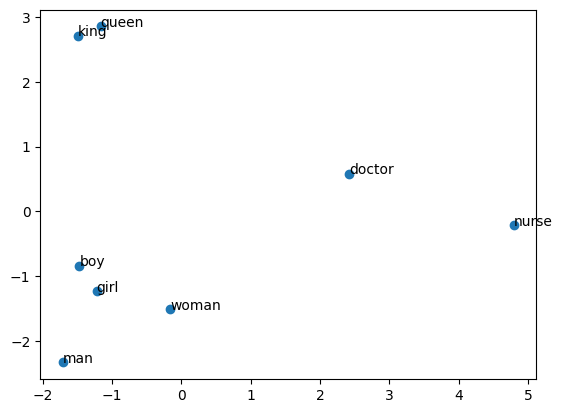

In [35]:
# the list of words we want to plot
words = ["man", "woman", "doctor", "nurse", "king", "queen", "boy", "girl"]

# an empty list for vectors
X = []
# get vectors for subset of words
for word in words:
    X.append(model[word])

# Use PCA for dimensionality reduction to 2D
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# or try SVD - how are they different?
#svd = TruncatedSVD(n_components=2)
# fit_transform the initialized PCA model
#result = svd.fit_transform(X)

# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])

# for each word in the list of words
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.show()

### Bonus tasks

If you run out of things to explore with these embeddings, try some of the following tasks:

[Easier]
- Write a ```.py``` script which takes the visualization code above which can be run from the command line directly

[Medium]
- Using what you (might) know about ```matplotlib``` make new plots like those above but cleaner and more informative

[Harder]
- Word embeddings are numerical vectors for individual tokens. Can you think about how you would create a document-level embedding for, say, a full sentence?
    - Try to implement a crude method of creating a sentence embedding from word embeddings in that sentence.
